In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from uncertainties import ufloat
import uncertainties.unumpy as unp

Breite bei 1/sqrt2 = 0.6958905980080701


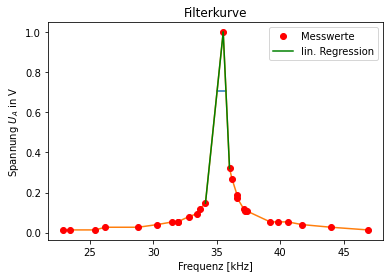

In [12]:
hz=np.genfromtxt('amp.dat', usecols=(0))
UAr=np.genfromtxt('amp.dat', usecols=(1))
UA=UAr/30
UE=2.5

U=UA/UE

a=12
b=13
einsm=(U[a]-U[a+1])/(hz[a]-hz[a+1])
einsb=U[a]-(einsm*hz[a])
einsy=1/np.sqrt(2)
eins=(einsy-einsb)/einsm

zweim=(U[b]-U[b+1])/(hz[b]-hz[b+1])
zweib=U[b]-(zweim*hz[b])
zweiy=1/np.sqrt(2)
zwei=(zweiy-zweib)/zweim

print('Breite bei 1/sqrt2 =',zwei-eins)
x=np.linspace(eins,zwei)
y=np.linspace(34.1,35.5)
z=np.linspace(35.5,36)
plt.plot(x,1/np.sqrt(2)*(x/x))

plt.plot(hz,U)
plt.plot(hz,U,'ro',label='Messwerte')
plt.plot(y,einsm*y+einsb,'g-',label='lin. Regression')
plt.plot(z,zweim*z+zweib,'g-')
plt.title('Filterkurve')
plt.xlabel('Frequenz [kHz]')
plt.ylabel('Spannung $U_A$ in V')
plt.legend(loc='best')
plt.savefig('verstaerker.pdf')


In [59]:
#Berechnung der Probeneigenschaften
pwDy2O3=7800
LDy2O3=0.13
mDy2O3=0.0151
pwGd2O3=7400
LGd2O3=0.165
mGd2O3=0.01408
R3=1000
F=8.66e-5
# Daten einlesen
OmegaDelta1=np.genfromtxt('proben.dat', usecols=(3))
OmegaDelta2=np.genfromtxt('proben.dat', usecols=(5))
OmegaDelta3=np.genfromtxt('proben.dat', usecols=(9))
OmegaDelta4=np.genfromtxt('proben.dat', usecols=(11))

# Delta Omega berechnen
OmegaDeltaD=OmegaDelta1-OmegaDelta2
OmegaDeltaG=OmegaDelta3-OmegaDelta4
OmegaDeltaDd=sum(OmegaDeltaD)/(len(OmegaDeltaD)*1000)
OmegaDeltaGd=sum(OmegaDeltaG)/(len(OmegaDeltaG)*1000)
print('Delta Omega für Dy2O3=',OmegaDeltaDd)
print('Delta Omega für Gd2O3=',OmegaDeltaGd)

# Q real berechnen
QrealD=mDy2O3/(LDy2O3*pwDy2O3)
QrealG=mGd2O3/(LGd2O3*pwGd2O3)
print('Qreal für Dy2O3=',QrealD)
print('Qreal für Gd2O3=',QrealG)

# Suszeptibilität berechnen
XiD=(2*OmegaDeltaDd*F)/(R3*QrealD)
XiG=(2*OmegaDeltaGd*F)/(R3*QrealG)
print('Xi für Dy2O3=',XiD)
print('Xi für Gd2O3=',XiG)



Delta Omega für Dy2O3= 1.5583333333333333
Delta Omega für Gd2O3= 0.7683333333333333
Qreal für Dy2O3= 1.4891518737672585e-05
Qreal für Gd2O3= 1.1531531531531532e-05
Xi für Dy2O3= 0.018124634437086094
Xi für Gd2O3= 0.011540126562500001
